## MNSIT Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./mnist/mnist_train.csv')
df

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# We prefer working with numpy arrays rather than DataFrames
data = df.values

# Randomizing the Data
import numpy as np

np.random.shuffle(data)

In [ ]:
# Seperating out labels and pixels

x = data[:,1:]
print(x)

y = data[:,0]
print(type(y))

In [ ]:
# Visualize one image 
X = x;
# cmap = 'gray' for greyscale
plt.imshow(X[0].reshape(28,28),cmap = 'gray')

In [ ]:
# Writing Function :

def drawImg(x,y,i):
    plt.imshow(x[i].reshape(28,28))
    plt.title("Label : " +str(y[i]))
    plt.show()

for i in range (5):
    drawImg(x,y,i)

## Spliting the DataSet

In [ ]:
trainsize = int(0.8*x.shape[0])
print(trainsize)

In [ ]:
X_Train,Y_Train = x[:trainsize,:],y[:trainsize]
X_Test,Y_Test = x[trainsize: , :], y[ trainsize:]

## Randomise Rows of Data

In [ ]:
import numpy as np 
a = np.array([[1,2],[3,4]])
np.random.shuffle(a)
print(a)

#### Visualzing Grid of let say 25 Images using SUb-Plots

In [ ]:
# Grid of 5x5 images
# subplot(gridx,girdy,cellnumber)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_Train[i].reshape(28,28))
    plt.title("Label : " +str(Y_Train[i]))
    plt.axis('off')
    
plt.show()


### Train Test Split using SkLearn Libraby

In [ ]:
! pip install sklearn


In [ ]:
from sklearn.model_selection import train_test_split


# random_state = 3 : for same shuffling every time || seed
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state = 3)

print(X_train.shape, str(Y_train.shape) )
print(str(X_test.shape) + str(Y_test.shape) )

In [ ]:
import pandas as pd
df.to_

In [ ]:
series = [[23,45,12,679], [14,48,69,38]]

new_series = np.array(series)

print (new_series.ndim)

print (new_series.shape)

print (new_series.dtype)



## 1. Data Prepration

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/mnist/mnist_train.csv')


In [3]:
print(df.shape)

(60000, 785)


In [4]:
print(df)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x2

In [16]:
data = df.values # numpy array
np.random.shuffle(data)
print(data)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]


In [17]:
X = data[:,1:]
Y = data[:,0]
print(X)
print(Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 6 ... 0 0 2]


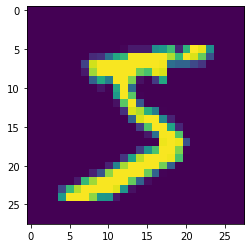

In [8]:
plt.imshow(X[0].reshape(28,28))
plt.show()

### 80% : Training and rest Testing

In [23]:
split = int(0.8*X.shape[0])
print(split)
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split]
Y_test = Y[split:]
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

48000
(48000, 784) (12000, 784)
(48000,) (12000,)


## 2. Applying KNN 

In [21]:
# Simple KNN

In [28]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    n = X.shape[0]

    for i in range(n):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))

    vals.sort()
    #print(vals)
    labels=[]
    for i in range(k):
        d,label = vals[i]
        labels.append(label)
    
    
    labels = np.array(labels)
    unique, counts = np.unique(labels, return_counts=True)
    
    #print(unique)
    #print(counts)

    ind  = np.argmax(counts)  # Returns Index of Maximum value in the Array

    return unique[ind]



queryX = np.array([2,2.5])
queryY = knn(X_train,Y_train,X_test[10],10)
print(f"{Y_test[10]} == {queryY}")
print(f"Class of the Given point is {queryY}")





9 == 9
Class of the Given point is 9


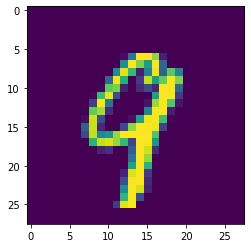

In [29]:
plt.imshow(X_test[10].reshape(28,28))
plt.show()

In [40]:
# Testing Our function on all of the Test Data

n = X_test.shape[0]
resY = []
for i in range(100):

    temp=  knn(X_train,Y_train,X_test[i],5)
    print(temp)
    resY.append(temp)
#print((z))



1
7
6
8
1
3
2
3
8
3
9
6
5
5
7
3
3
4
9
0
4
4
8
1
0
7
7
6
0
6
2
6
2
6
3
7
6
0
7
0
5
3
2
2
9
5
6
4
2
5
6
4
8
0
4
3
1
4
1
4
2
2
7
1
9
6
9
0
7
9
5
0
4
6
9
1
2
9
8
3
6
1
8
6
9
9
3
2
1
8
1
0
0
7
1
4
8
5
4
0


In [41]:
resY = np.array(resY)
#print(resY)
#print(Y_test[:10])
#print((Y_test[:10]==resY))
count = np.count_nonzero(Y_test[:100]==resY)
accuracy = count/100
#print(np.count_nonzero(Y_test[:10]==resY))
print(accuracy)

0.97
